In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/My\ Drive/CNN-Dataset

[Errno 2] No such file or directory: 'drive/My Drive/CNN-Dataset'
/content


In [ ]:
ls

 COVID/   Normal/  'Viral Pneumonia'/


In [ ]:
pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 485 kB/s 
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=50d67469e91f2e4d639998d7613b65c48ed362fc46084dd7af318d58ee8b5fd8
  Stored in directory: /root/.cache/pip/wheels/d2/83/71/a781667865955ae7dc18e5a4038401deb56d96eb85d3a5f1c0
Successfully built np-utils


In [ ]:
#libraries required to train the model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm
from tensorflow.keras import layers, models
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder



In [ ]:
dataset_dir="/content/drive/My Drive/CNN-Dataset"

In [ ]:
imgpath=[]
for (dirnames, foldernames, filenames) in os.walk(dataset_dir): #get the full path name of a type of file into all subdirectories with walk
    print(dirnames,foldernames,filenames)
    for filename in filenames:
        if (filename[-3:]=='png'): #using list slicing we can fetch the last 'n' elements from list
            imgpath.append(os.path.join(dirnames, filename)) #os.path.join  combines one or more path names into a single path and then paths will be appended to list imgpath

/content/drive/My Drive/CNN-Dataset ['COVID', 'Normal', 'Viral Pneumonia'] []
/content/drive/My Drive/CNN-Dataset/COVID [] ['COVID-927.png', 'COVID-933.png', 'COVID-898.png', 'COVID-956.png', 'COVID-906.png', 'COVID-944.png', 'COVID-934.png', 'COVID-964.png', 'COVID-937.png', 'COVID-900.png', 'COVID-881.png', 'COVID-917.png', 'COVID-899.png', 'COVID-920.png', 'COVID-870.png', 'COVID-888.png', 'COVID-891.png', 'COVID-877.png', 'COVID-925.png', 'COVID-871.png', 'COVID-869.png', 'COVID-904.png', 'COVID-932.png', 'COVID-889.png', 'COVID-958.png', 'COVID-875.png', 'COVID-915.png', 'COVID-879.png', 'COVID-896.png', 'COVID-894.png', 'COVID-901.png', 'COVID-939.png', 'COVID-919.png', 'COVID-908.png', 'COVID-895.png', 'COVID-907.png', 'COVID-882.png', 'COVID-914.png', 'COVID-922.png', 'COVID-918.png', 'COVID-897.png', 'COVID-878.png', 'COVID-911.png', 'COVID-893.png', 'COVID-902.png', 'COVID-913.png', 'COVID-886.png', 'COVID-912.png', 'COVID-856.png', 'COVID-865.png', 'COVID-887.png', 'COVID-84

In [ ]:
#initialize the list of image data and target labels
data=[]
target=[]
resize=150

dic={'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19'} #dictionary to map file label name with target label name

In [ ]:
for imgpaths in tqdm(imgpath):  #tqdm is used to make terminal progress bar
    label=imgpaths.split(os.path.sep)[-2]
    image=cv2.imread(imgpaths)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image=cv2.resize(image, (resize, resize)) /255 #resizing the image


    #updates the respective data and target label lists
    data.append(image)
    target.append(dic[label])

100%|██████████| 9981/9981 [58:14<00:00,  2.86it/s]


In [ ]:
print(len(data)) #to know length of data

9981


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


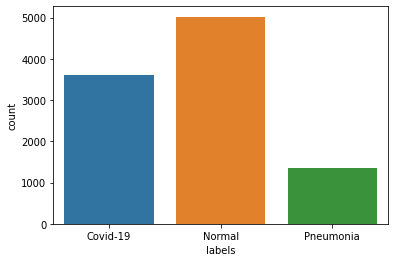

In [ ]:
#box plot and counting the lables
df=pd.DataFrame(target,columns=['labels'])
sns.countplot(df['labels'])
plt.show()

In [ ]:
size=[]
for file in imgpath: #for loop to get image paths
    img=plt.imread(file) #used to read an image from a file into an array
    size.append(img.shape) #image.shape returns a tuple of the number of rows, columns, and channels (if the image is color).
pd.Series(size).value_counts() #it retures a series containing counts of unique values

(299, 299)       9841
(299, 299, 3)     140
dtype: int64

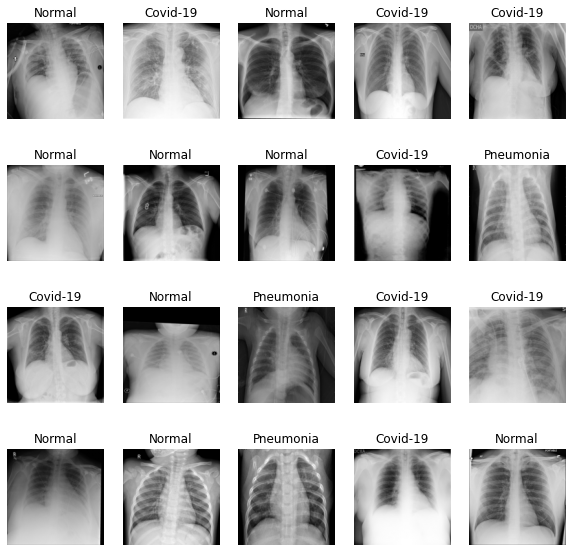

In [ ]:
plt.figure(figsize=(10,10)) #to change the size of the images
for c , i in enumerate(list(np.random.randint(0,len(imgpath),20))) : #enumerate() to get a counter and the value from the iterable at the same time and random.randit() to generate randome images from image path
    plt.subplot(4,5,c+1)
    plt.imshow(data[i] , cmap='gray')
    plt.title(target[i])
    plt.axis('off')
plt.show()

In [ ]:
#encode labels as integer
le=LabelEncoder() #labelencoder used to normalize labels
labels=le.fit_transform(target) #also be used to transform non-numerical labels to numerical labels
labels=to_categorical(labels)

print(le.classes_)
print(labels[0])

['Covid-19' 'Normal' 'Pneumonia']
[1. 0. 0.]


In [ ]:
#spliting data into training and testing (80-20 Ratio)

(trainX, testX, trainY, testY)=train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(trainY)
testY=np.array(testY)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(7984, 150, 150, 3)
(1997, 150, 150, 3)
(7984, 3)
(1997, 3)


In [ ]:
trainX[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.01568627, 0.01568627, 0.01568627]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.0745098 , 0.0745098 , 0.0745098 ],
        [0.11372549, 0.11372549, 0.11372549],
        [0.19215686, 0

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

In [ ]:
#CNN Model
s=150
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(s,s,3), kernel_initializer='he_normal'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

In [ ]:
#compile
model.compile(optimizer=Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 33, 33, 128)      0

In [ ]:
data=[]

In [ ]:
imgpath=[]

In [ ]:
df=[]

In [ ]:
size=[]

In [ ]:
#will train model upto 20 epochs
epochs=20
batch_size=64

ThisModel=model.fit(trainX, trainY, batch_size, steps_per_epoch=len(trainX) // batch_size, validation_data=(testX, testY), validation_steps=len(testX) // batch_size, epochs=epochs, verbose=1)

Epoch 1/20
124/124 [==============================] - 394s 3s/step - loss: 0.8452 - accuracy: 0.7611 - val_loss: 0.3429 - val_accuracy: 0.8543
Epoch 2/20
124/124 [==============================] - 387s 3s/step - loss: 0.3103 - accuracy: 0.8801 - val_loss: 0.2952 - val_accuracy: 0.8826
Epoch 3/20
124/124 [==============================] - 386s 3s/step - loss: 0.2495 - accuracy: 0.9071 - val_loss: 0.2592 - val_accuracy: 0.8992
Epoch 4/20
124/124 [==============================] - 385s 3s/step - loss: 0.2015 - accuracy: 0.9245 - val_loss: 0.2234 - val_accuracy: 0.9168
Epoch 5/20
124/124 [==============================] - 390s 3s/step - loss: 0.1585 - accuracy: 0.9446 - val_loss: 0.1988 - val_accuracy: 0.9340
Epoch 6/20
124/124 [==============================] - 390s 3s/step - loss: 0.1242 - accuracy: 0.9571 - val_loss: 0.2230 - val_accuracy: 0.9259
Epoch 7/20
124/124 [==============================] - 388s 3s/step - loss: 0.0984 - accuracy: 0.9639 - val_loss: 0.1883 - val_accuracy: 0.9420

In [ ]:
model.save('/content/drive/My Drive/CPN Dataset/CPN_Model.h5')

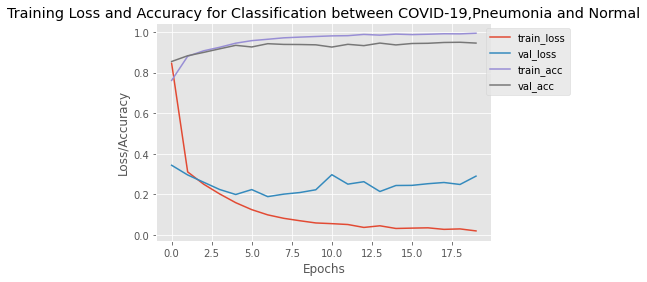

In [ ]:
#loss/accuracy graph
n=epochs
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), ThisModel.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), ThisModel.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n), ThisModel.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), ThisModel.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Classification between COVID-19,Pneumonia and Normal")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.savefig("plot.png")

In [ ]:
#to check test accuacy
modelLoss, modelAccuracy=model.evaluate(testX, testY, verbose=0)

print('Test Loss is: {}'.format(modelLoss))
print('Test Accuracy is: {}'.format(modelAccuracy ))

Test Loss is: 0.2874622046947479
Test Accuracy is: 0.945418119430542


In [ ]:
modelLoss=[]

In [ ]:
modelAccuracy=[]

In [ ]:
#classification report on train
predIdxs = model.predict (trainX, batch_size=64)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits=3))

125/125 [==============================] - 95s 749ms/step
              precision    recall  f1-score   support

    Covid-19      0.998     0.999     0.998      2892
      Normal      1.000     0.998     0.999      4016
   Pneumonia      0.996     1.000     0.998      1076

    accuracy                          0.998      7984
   macro avg      0.998     0.999     0.998      7984
weighted avg      0.999     0.998     0.998      7984



In [ ]:
predIdxs=[]

In [ ]:
#classification report on test
predIdxs=model.predict(testX, batch_size=64)
predIdxs=np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits=3))

32/32 [==============================] - 25s 765ms/step
              precision    recall  f1-score   support

    Covid-19      0.924     0.963     0.943       724
      Normal      0.967     0.932     0.949      1004
   Pneumonia      0.927     0.948     0.938       269

    accuracy                          0.945      1997
   macro avg      0.940     0.948     0.943      1997
weighted avg      0.946     0.945     0.945      1997



In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(testY.argmax(axis=1), predIdxs)
print(confusionmatrix)

[[697  22   5]
 [ 53 936  15]
 [  4  10 255]]


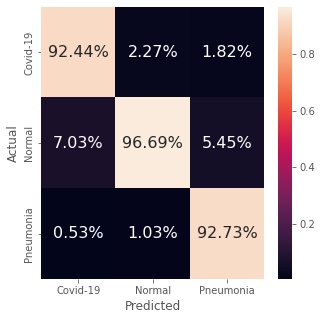

In [ ]:
#heatmap
df_cm=pd.DataFrame(confusionmatrix, columns=le.classes_, index=le.classes_)
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(5,5))
sns.heatmap(df_cm/np.sum(df_cm), fmt='.2%', annot=True, annot_kws={'size':16})
plt.show()

In [ ]:
#loading the model
from tensorflow import keras
model=keras.models.load_model('/content/drive/MyDrive/CPN Dataset/CPN_Model.h5')

In [ ]:
#necessary libraries
from numpy import asarray
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [ ]:
#image paths
covid_img_path="/content/drive/MyDrive/CNN-Dataset/COVID/COVID-19.png"
normal_img_path="/content/drive/MyDrive/CNN-Dataset/Normal/Normal-500.png"
pneumonia_img_path="/content/drive/MyDrive/CNN-Dataset/Viral Pneumonia/Viral Pneumonia-1000.png"

img_paths=[covid_img_path, normal_img_path, pneumonia_img_path]

In [ ]:
print(img_paths)

['/content/drive/MyDrive/CNN-Dataset/COVID/COVID-19.png', '/content/drive/MyDrive/CNN-Dataset/Normal/Normal-500.png', '/content/drive/MyDrive/CNN-Dataset/Viral Pneumonia/Viral Pneumonia-1000.png']


In [ ]:
#preprocessing the image
resize=150

images=[]

for img_path in img_paths:
  img_path=cv2.imread(img_path)
  img_path=cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB)
  img_path=cv2.resize(img_path, (resize, resize)) /255
  images.append(img_path)

In [ ]:
#printing image shape
count=0
for _ in images:
  images[count]=np.array(images[count])
  images[count]=np.expand_dims(images[count], axis=0)
  print(images[count].shape)
  count+=1

(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)


In [ ]:
#prediction
prediction=[]
for i in images:
  prediction.append(model.predict(i))

1/1 [==============================] - 0s 33ms/step


In [ ]:
#output of prediction
output=[]
for p in prediction:
  output.append(np.argmax(p,axis=1))

In [ ]:
#0: COVID-19
#1: Normal
#2: Pneumonia

title=[]

for out in output:
  if out==0:
    title.append('COVID-19')
  elif out==1:
    title.append('Normal')
  else:
    title.append('Pneumonia')

print(title)

['Normal', 'Normal', 'Pneumonia']


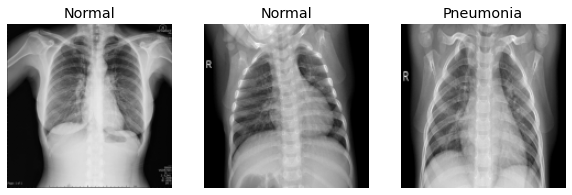

In [ ]:
#printing the images with predicted output
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

i=0

for img in images:
  plt.subplot(1,3,i+1)
  plt.imshow(np.squeeze(img) , cmap='gray')
  plt.title(title[i])
  plt.axis('off')
  i+=1
plt.show()